<a href="https://colab.research.google.com/github/Skyoss1/crawl_data/blob/main/convert_pdf_to_png.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pdf2image

Saving BaoCaoDoAnTN (2) (1).pdf to BaoCaoDoAnTN (2) (1).pdf
Uploaded file: BaoCaoDoAnTN (2) (1).pdf
Saved: /content/output/page_1.png
Saved: /content/output/page_2.png
Saved: /content/output/page_3.png
Saved: /content/output/page_4.png
Saved: /content/output/page_5.png
Saved: /content/output/page_6.png
Saved: /content/output/page_7.png
Saved: /content/output/page_8.png
Saved: /content/output/page_9.png
Saved: /content/output/page_10.png
Saved: /content/output/page_11.png
Saved: /content/output/page_12.png
Saved: /content/output/page_13.png
Saved: /content/output/page_14.png
Saved: /content/output/page_15.png
Saved: /content/output/page_16.png
Saved: /content/output/page_17.png
Saved: /content/output/page_18.png
Saved: /content/output/page_19.png
Saved: /content/output/page_20.png
Saved: /content/output/page_21.png
Saved: /content/output/page_22.png
Saved: /content/output/page_23.png
Saved: /content/output/page_24.png
Saved: /content/output/page_25.png
Saved: /content/output/page_26.png

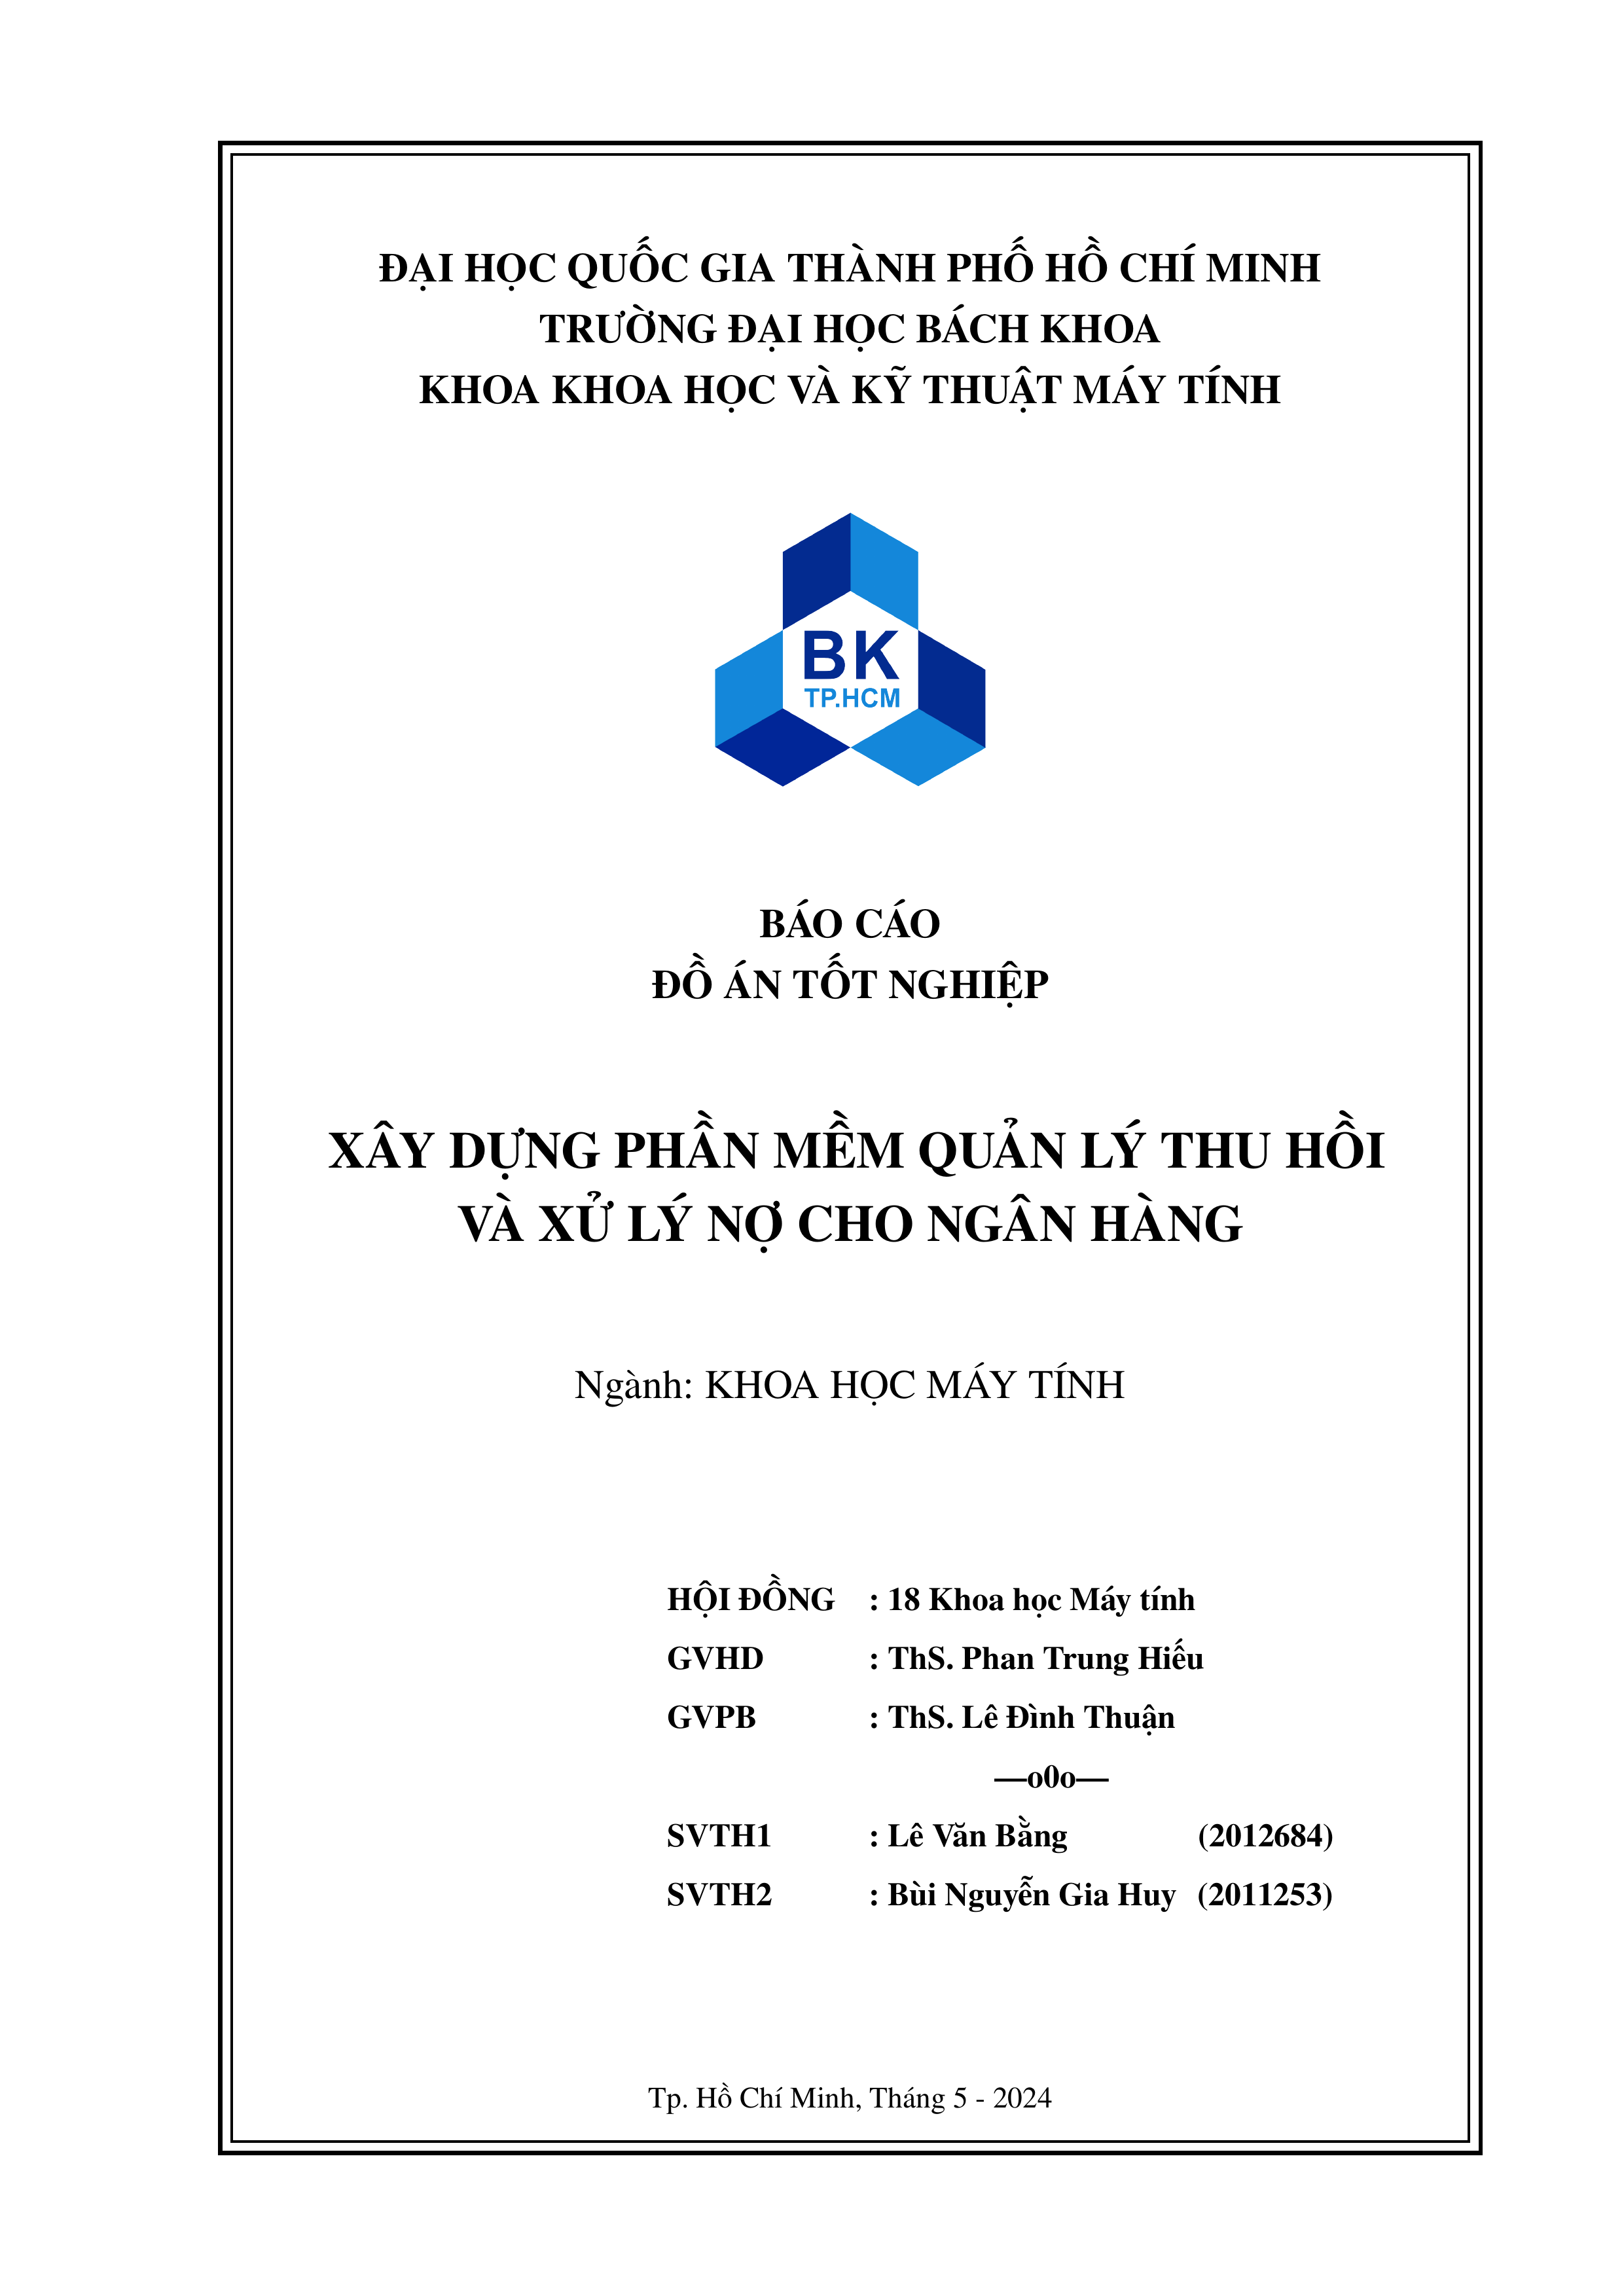

Converted 108 pages to PNG.
You can find all PNG files in the '/content/output' folder.

Performance Metrics:
Execution Time: 87.84 seconds
RAM Usage: 3487.52 MB
GPU Memory Usage: 0.00 MB
Do you want to download the PNG files? (yes/no): yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First page downloaded. You can access all pages in the '/content/output' folder.


In [22]:
# Install required libraries
!pip install pdf2image psutil torch

import os
import time
import psutil
import torch
from pdf2image import convert_from_path
from google.colab import files
from IPython.display import display, Image

def get_gpu_memory():
    if torch.cuda.is_available():
        return torch.cuda.memory_allocated() / 1024**2  # Convert to MB
    return 0

def pdf_to_png(pdf_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    start_time = time.time()
    start_ram = psutil.virtual_memory().used / 1024**2  # Convert to MB
    start_gpu = get_gpu_memory()

    pages = convert_from_path(pdf_path, 300)  # 300 DPI

    png_files = []
    for i, page in enumerate(pages):
        output_file = os.path.join(output_folder, f'page_{i+1}.png')
        page.save(output_file, 'PNG')
        png_files.append(output_file)
        print(f'Saved: {output_file}')

    end_time = time.time()
    end_ram = psutil.virtual_memory().used / 1024**2  # Convert to MB
    end_gpu = get_gpu_memory()

    metrics = {
        'execution_time': end_time - start_time,
        'ram_usage': end_ram - start_ram,
        'gpu_memory_usage': end_gpu - start_gpu
    }

    return png_files, metrics

# Upload PDF file
uploaded = files.upload()

if uploaded:
    pdf_filename = next(iter(uploaded))
    print(f"Uploaded file: {pdf_filename}")

    # Convert PDF to PNG and measure performance
    output_folder = '/content/output'
    png_files, metrics = pdf_to_png(pdf_filename, output_folder)

    # Display the first page
    if png_files:
        display(Image(png_files[0]))
        print(f"Converted {len(png_files)} pages to PNG.")
        print("You can find all PNG files in the '/content/output' folder.")

    # Display performance metrics
    print("\nPerformance Metrics:")
    print(f"Execution Time: {metrics['execution_time']:.2f} seconds")
    print(f"RAM Usage: {metrics['ram_usage']:.2f} MB")
    print(f"GPU Memory Usage: {metrics['gpu_memory_usage']:.2f} MB")

    # Option to download files
    download = input("Do you want to download the PNG files? (yes/no): ")
    if download.lower() == 'yes':
        files.download(png_files[0])  # Download the first page
        print("First page downloaded. You can access all pages in the '/content/output' folder.")
else:
    print("No file was uploaded. Please run the cell again and upload a PDF file.")